### Persistance images from H0 and H1 persistence

In [3]:
# import libraries
import numpy as np
import re
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

import glob
import pickle
import geopandas as gpd
import dcor
import pandas as pd


/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load the dictonary into a dictionary from the pkl files
data = {}

for file in glob.glob("/Users/h6x/Desktop/selected_coordinates_below_90th_all_variables/IN/*.pkl"):
    with open(file, 'rb') as f:
        
        # select last 20 characters of the file name
        extracted_words = file[-20:]

        match = re.search(r'(\d+)', extracted_words)
        if match:
            extracted_number = match.group(1)
            # print(extracted_number)
            # print(type(extracted_number))

            data[extracted_number] = pd.read_pickle(f)
        else:
            print("No number found in the string.")

In [20]:
# imoporting SVI data for the entire US(county level) 
us_svi = gpd.read_file('../data/processed data/SVI - census tract level/SVI 2018 with HepVu census tracts/SVI2018_US_census_with_opioid_indicators.shp')

In [21]:

# imoporting SVI data for the entire US(county level)
us_svi_processed = gpd.read_file('/Users/h6x/ORNL/git/opioid-risk-modeling/tennessee/data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu/SVI2018_TN_census_tracts_with_death_rate_HepVu.shp')

In [ ]:
# Lets create a distance matrix for the SVI data for each county using all the data without filtering anything

In [23]:
# het the unique STCNTY from us_svi_processed
unique_stcnty = us_svi_processed['STCNTY'].unique()

In [24]:
len(unique_stcnty)

95

In [28]:
VARIABLES = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [32]:
import ripser
import persim

def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

47001
(18, 16)
[[-1.00000000e+00  1.01085338e-03  2.94069430e-01  8.86757024e-04
   6.32099278e-04  1.12967934e-03  1.64031769e-01  6.02721195e-04
   4.90260249e-01  8.35668633e-01  6.92248083e-01  8.00723914e-01
   2.59688932e-03  6.97539769e-01  8.03175617e-04  7.53064924e-01]
 [ 1.01085338e-03 -1.00000000e+00  3.04245150e-01  5.15691423e-04
   2.47864117e-04  2.68585619e-04  1.65783728e-01  2.83437678e-04
   5.06751578e-01  8.44565438e-01  6.96913350e-01  8.08955407e-01
   1.76249374e-03  7.05545099e-01  3.04836708e-04  7.62541559e-01]
 [ 2.94069430e-01  3.04245150e-01 -1.00000000e+00  2.99381977e-01
   3.02501175e-01  3.01156514e-01  3.43538767e-01  3.00029753e-01
   3.65445866e-01  4.38755135e-01  5.56698217e-01  5.24175226e-01
   3.01049861e-01  4.53149718e-01  3.04790909e-01  6.56898687e-01]
 [ 8.86757024e-04  5.15691423e-04  2.99381977e-01 -1.00000000e+00
   5.15891913e-04  5.61052495e-04  1.64887756e-01  2.46860226e-04
   5.05716090e-01  8.38955906e-01  6.80898887e-01  8.03052

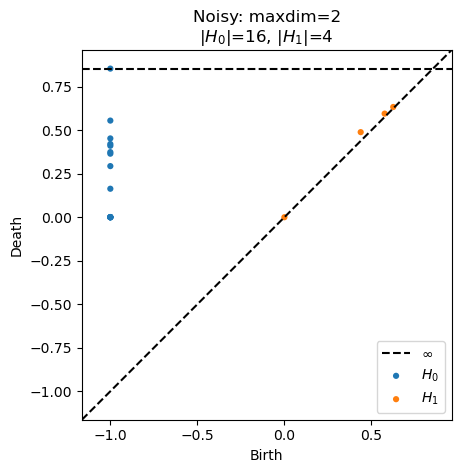

In [34]:
for county in unique_stcnty:

    selected_counties_dist = np.zeros((16, 16))

    print(county)
    #get the data for the county
    county_data = us_svi_processed[us_svi_processed['STCNTY'] == county]
    # print(county_data)

    matrix_df = county_data[VARIABLES]

    # create a matrix from matrix_df
    data_matrix = matrix_df.to_numpy()

    print(data_matrix.shape)

    for i in range(16):
        for j in range(16):
            selected_counties_dist[i, j] = dcor.distance_correlation(data_matrix[:, i], data_matrix[:, j]) #Distance Correlations 

    selected_counties_dist = selected_counties_dist.T + np.eye(16)
    selected_counties_dist = 1 - selected_counties_dist

    # print(selected_counties_dist)

    dgm_noisy = ripser.ripser(selected_counties_dist, distance_matrix=True)['dgms']

    persim.plot_diagrams(
        dgm_noisy, show=True,
        title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
    )



    break

##### Distance matrix

In [6]:
import ripser
import persim

def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

In [39]:
VARIABLES = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [7]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [38]:
# imoporting SVI data for the entire US(county level) 
us_svi = gpd.read_file('../data/processed data/SVI - census tract level/SVI 2018 with HepVu census tracts/SVI2018_US_census_with_opioid_indicators.shp')

18019
EP_POV


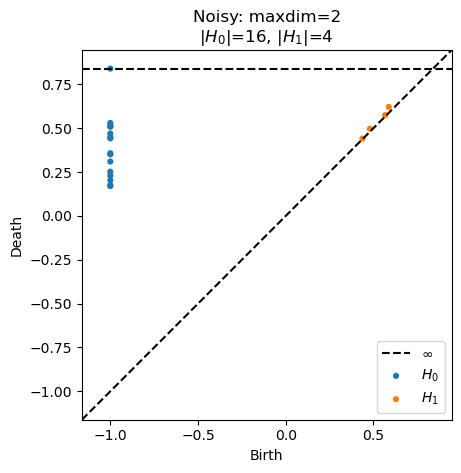

EP_UNEMP


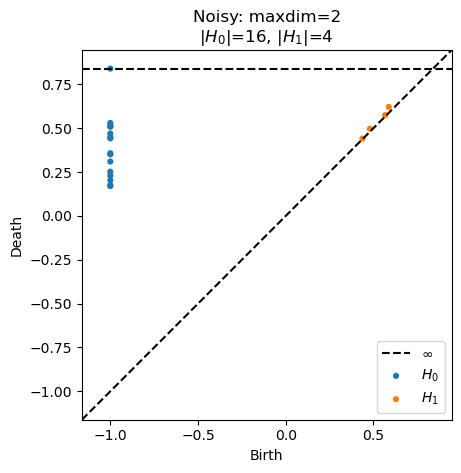

EP_PCI


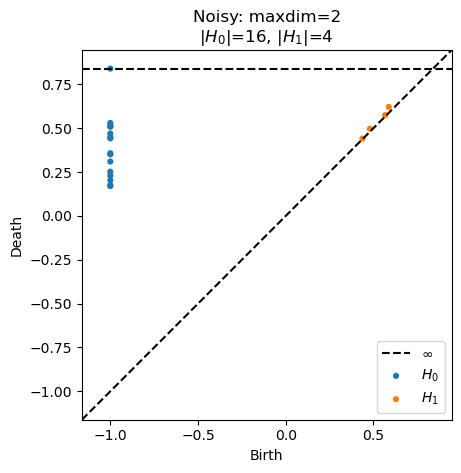

EP_NOHSDP


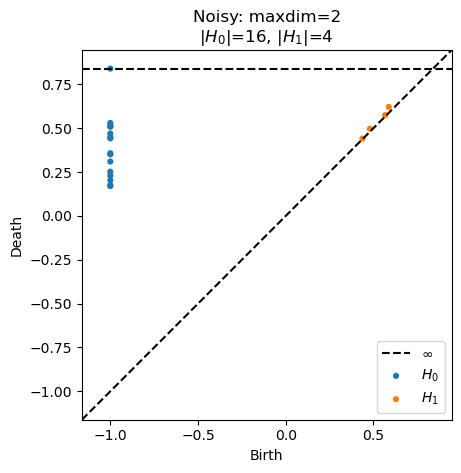

EP_UNINSUR


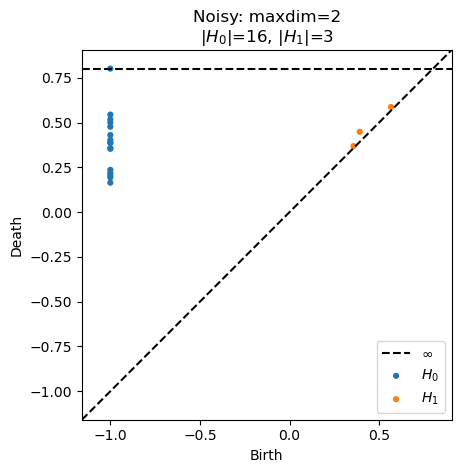

EP_AGE65


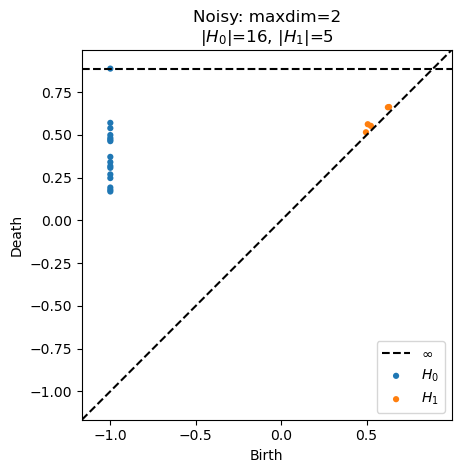

EP_AGE17


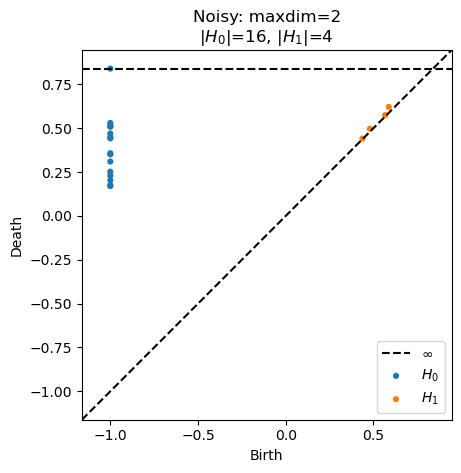

EP_DISABL


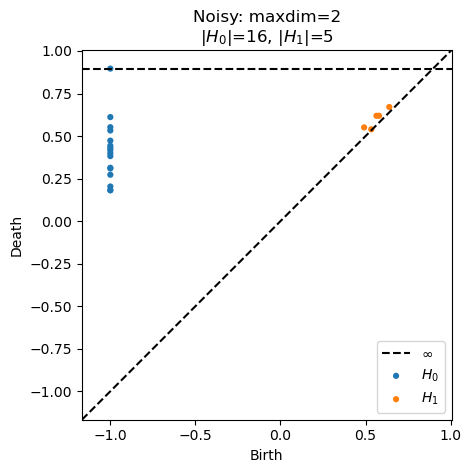

EP_SNGPNT


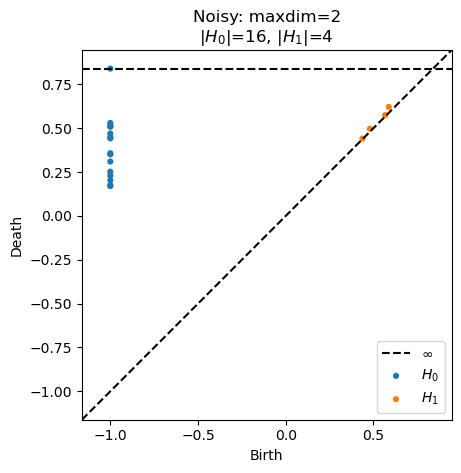

EP_LIMENG


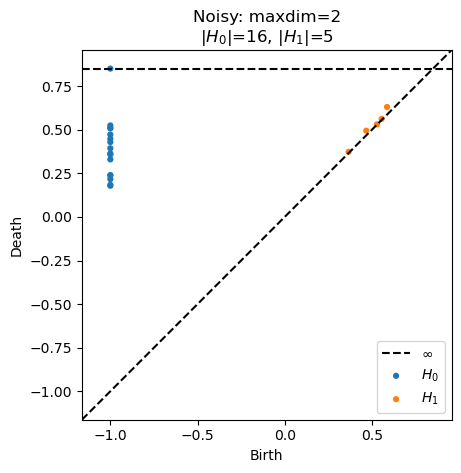

EP_MINRTY


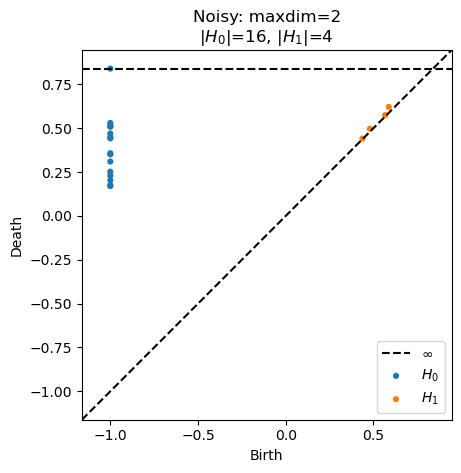

EP_MUNIT


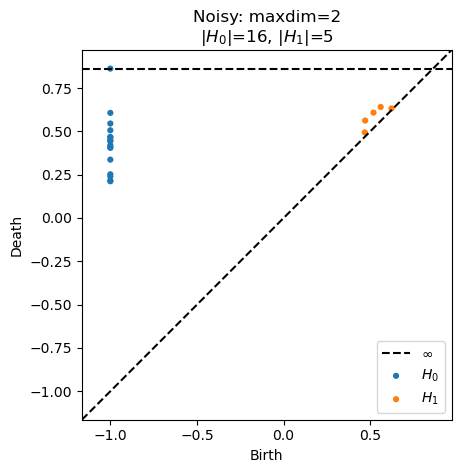

EP_MOBILE


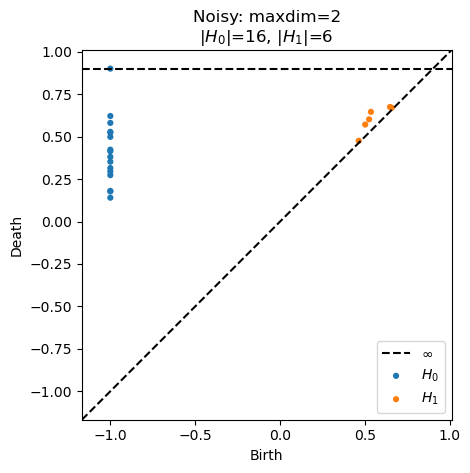

EP_CROWD


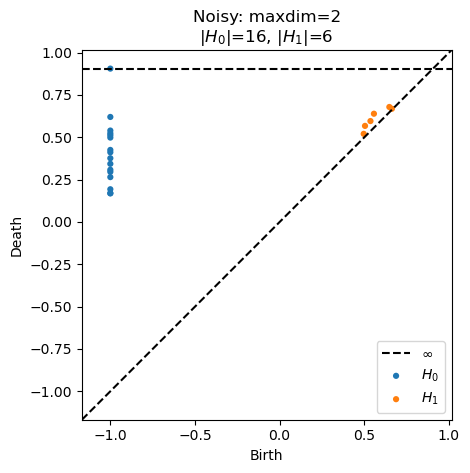

EP_NOVEH


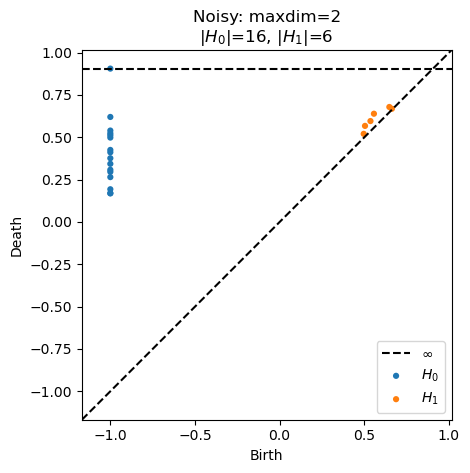

EP_GROUPQ


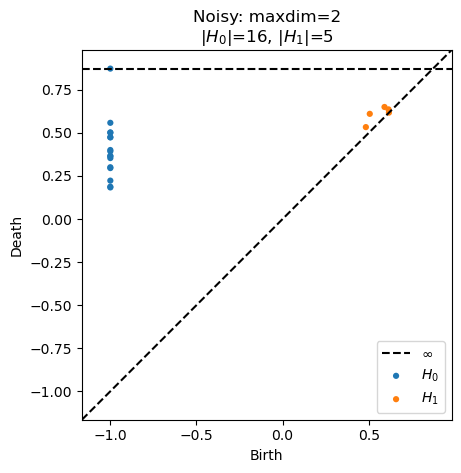

In [49]:
for fips, dictionary in data.items():
    # data is a dictionary where the key is the county code and the value is a another dictionary

    selected_counties_dist = np.zeros((16, 16))


    print(fips)

    # print(dictionary.keys())

    # get the value of the dictionary for the first key
    # print(dictionary['EP_POV']['FIPS'])

    for key, value in dictionary.items():

        selected_counties_dist = np.zeros((16, 16))
        
        print(key)
        # print(len(value['FIPS']))

        # filter the df where "FIPS" in us_svi value in the value['FIPS']
        county_data = us_svi[us_svi['FIPS'].isin(value['FIPS'])]
        matrix_df = county_data[VARIABLES]
        data_matrix = matrix_df.to_numpy()

        for i in range(16):
            for j in range(16):
                selected_counties_dist[i, j] = dcor.distance_correlation(data_matrix[:, i], data_matrix[:, j]) #Distance Correlations 

        selected_counties_dist = selected_counties_dist.T + np.eye(16)
        selected_counties_dist = 1 - selected_counties_dist

        # print(selected_counties_dist)

        dgm_noisy = ripser.ripser(selected_counties_dist, distance_matrix=True)['dgms']

        persim.plot_diagrams(
            dgm_noisy, show=True,
            title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
        )

        # break

    break
        